In [2]:
#### Implementation of ANN with SGD and Backprop
#### original OOP implementation can be found at: https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
## layer:
## take input X: (Nx1)
## multiply by weights W: (h1xN)
## add bias b: (h1x1)
def layer(X, W, b): return np.dot(W, X) + b

In [4]:
## lets take the activation as sigmoid (element-wise)
def sigmoid(x): return 1 / (1 + np.exp(-x))

In [5]:
## lets define the derivative of the sigmoid
def sigmoid_prime(x): return sigmoid(x)*(1.0 - sigmoid(x))

In [6]:
## define the mse cost per sample
def mse(y_pred, y_true): return (1 / 2) * np.square(y_pred - y_true)

In [7]:
## derivative of mse
def mse_prime(y_pred, y_true): return (y_pred - y_true)

In [8]:
## NN parameters
N = 50
num_nes = [N, 40, 30, 20, 10]
num_layers = len(num_nes) - 1
learning_rate = 0.01
num_epochs = 1000
num_data_samples = 100

## dict to hold neuron input-output pairs
layer_in_out_dict = dict()
## dict to hold the cost derivatives w.r.t to the params
layer_derivative_dict = dict()

In [9]:
## the dict to hold the layer weights and biases
weight_dict = {'w'+str(i): np.random.normal(size=(num_nes[i+1], num_nes[i])) for i in range(num_layers)}
bias_dict = {'b'+str(i): np.random.normal(size=(num_nes[i+1], 1)) for i in range(num_layers)}

In [10]:
def NN(inputs):
    a = inputs
    layer_in_out_dict['a0'] = a
    ## forward pass
    for i in range(num_layers):
        #print(i)
        z = layer(a, weight_dict['w'+str(i)], bias_dict['b'+str(i)])
        a = sigmoid(z)
        layer_in_out_dict['z'+str(i)] = z
        layer_in_out_dict['a'+str(i+1)] = a
    out = a
    return out

In [11]:
## Test the NN with a dummy forward pass
inp = np.random.uniform(0, 1, size=(N,1)) * 255.0
out_true = np.random.uniform(0, 1, size=(num_nes[-1], 1))
out = NN(inp)
error = mse(out, out_true)
print(np.mean(error))

0.12782519324391844


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [12]:
## Function to perform model prediction
def predict(inputs): return NN(inputs)

In [13]:
def compute_grads(inputs, targets):
    ## perform a forward pass (prediction)
    out = predict(inputs)
    ## Compute dC/dzL, dC/dwL and dC/dbL
    ## first dC/dzL = (a - y) * a * (1 - a)
    layer_derivative_dict['dz'+str(num_layers-1)] = mse_prime(out, targets) * out * (1 - out)
    ## second compute the dC/dwL = dC/dzL * dzL/dwL
    #print(layer_derivative_dict['dz'+str(num_layers-1)].shape)
    #print(layer_in_out_dict['a'+str(num_layers-1)].shape)
    layer_derivative_dict['dw'+str(num_layers-1)] = np.dot(layer_derivative_dict['dz'+str(num_layers-1)], \
                                                    np.transpose(layer_in_out_dict['a'+str(num_layers-1)]))
    ## third calculate the dC/dbL = dC/dzL * dzL/dbL
    layer_derivative_dict['db'+str(num_layers-1)] = layer_derivative_dict['dz'+str(num_layers-1)] * 1
    
    ## Now since we have the derivatives at the output layer, we can calculate the derivatives for the rest of the 
    ## layers
    for i in reversed(range(num_layers-1)):
        #print(i)
        ## first compute dC/dzl = [w(l+1)*dC/dz(l+1)]*sigmoid_prime(zl)
        layer_derivative_dict['dz'+str(i)] = np.dot(
                                                np.transpose(weight_dict['w'+str(i+1)]), layer_derivative_dict['dz'+str(i+1)]) \
                                                * sigmoid_prime(layer_in_out_dict['z'+str(i)])
        ## second compute dC/dwl = dC/dzl * dzl/dwl
        layer_derivative_dict['dw'+str(i)] = layer_derivative_dict['dz'+str(i)] * \
                                                    np.transpose(layer_in_out_dict['a'+str(i)])
        
        ## third compute dC/dbl = dC/dzl * dzl/dbl
        layer_derivative_dict['db'+str(i)] = layer_derivative_dict['dz'+str(i)] * 1

In [14]:
## test the gradient computation 
compute_grads(inp, out_true)
#print(layer_derivative_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [15]:
def update_param():
    for i in range(num_layers):
        weight_dict['w'+str(i)] = weight_dict['w'+str(i)] - learning_rate * layer_derivative_dict['dw'+str(i)]
        bias_dict['b'+str(i)] = bias_dict['b'+str(i)] - learning_rate * layer_derivative_dict['db'+str(i)]

In [16]:
## test param update function
update_param()

In [17]:
## make a dummy training dataset
inp_data = np.random.normal(size=(num_data_samples, num_nes[0]))
out_true_data = np.random.normal(size=(num_data_samples, num_nes[-1]))
#print(training_data)

In [18]:
mean_epoch_error_list = list()
for e in range(num_epochs):
    epoch_loss_list = list()
    for i in range(num_data_samples):
        inp = np.expand_dims(inp_data[i], 1)
        out_true = np.expand_dims(out_true_data[i], 1)
        #print(inp.shape)
        compute_grads(inp, out_true)
        update_param()
        out = predict(inp)
        error = np.mean(mse(out, out_true))
        epoch_loss_list.append(error)
    mean_epoch_error = np.mean(np.array(epoch_loss_list))
    mean_epoch_error_list.append(mean_epoch_error)
    print("Epoch loss: {}".format(mean_epoch_error))

Epoch loss: 0.5689086174299238
Epoch loss: 0.5114492484326746
Epoch loss: 0.4890953171485887
Epoch loss: 0.48034240510627724
Epoch loss: 0.47626088539844297
Epoch loss: 0.47403089508162827
Epoch loss: 0.4726458125550406
Epoch loss: 0.47169583525186154
Epoch loss: 0.4709928884455449
Epoch loss: 0.47044090128318705
Epoch loss: 0.4699863319891285
Epoch loss: 0.4695972445980423
Epoch loss: 0.46925358039506365
Epoch loss: 0.46894225880669177
Epoch loss: 0.4686545386864852
Epoch loss: 0.4683845073406971
Epoch loss: 0.46812815869664354
Epoch loss: 0.46788278992652105
Epoch loss: 0.4676465779373622
Epoch loss: 0.46741826749488957
Epoch loss: 0.4671969405909174
Epoch loss: 0.4669818541582029
Epoch loss: 0.46677233757905434
Epoch loss: 0.46656773919562683
Epoch loss: 0.46636740798013504
Epoch loss: 0.4661706960235859
Epoch loss: 0.46597696998152877
Epoch loss: 0.46578562365257375
Epoch loss: 0.4655960877745051
Epoch loss: 0.4654078359235181
Epoch loss: 0.46522038693049717
Epoch loss: 0.465033304

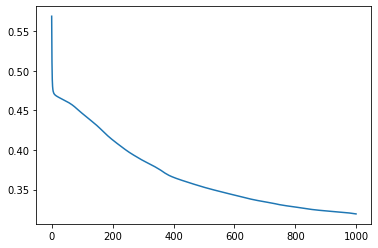

In [19]:
## Plot the model performance
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_error_list)